In [61]:
import tables
import hdf5_getters
import os
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import gensim

In [54]:
'''
conn = sqlite3.connect('file:mxm_dataset.db?mode=ro', uri=True)
curs = conn.cursor()
tracks = dict()
for (word, track, count, word_id) in curs.execute("SELECT l.word, l.track_id, l.count, w.ROWID FROM lyrics l, words w WHERE w.word=l.word;"):
    if track in tracks:
        tracks[track].append((word_id, count))
    else:
        tracks[track] = [(word_id, count)]
words = dict()
for (word, word_id) in curs.execute("SELECT w.word, w.ROWID FROM words w"):
    words[word_id] = word
'''

In [69]:
import pickle
with open('tracksBow.pickle','rb') as f:
    pickle.load(f)
with open('id2word.pickle','rb') as f:
    pickle.load(f)

In [32]:
h5 = hdf5_getters.open_h5_file_read(os.getcwd()+'/MillionSongSubset/data/A/A/A/TRAAAAW128F429D538.h5')
duration = hdf5_getters.get_duration(h5)
name = hdf5_getters.get_artist_name(h5)
terms = hdf5_getters.get_artist_terms(h5)
hotttnesss = hdf5_getters.get_song_hotttnesss(h5)
title = hdf5_getters.get_title(h5)
h5.close()
print(title)
print(name)
print(terms)
print(hotttnesss)

b"I Didn't Mean To"
b'Casual'
[b'hip hop' b'underground rap' b'g funk' b'alternative rap' b'gothic rock'
 b'west coast rap' b'rap' b'club dance' b'singer-songwriter' b'chill-out'
 b'underground hip hop' b'rock' b'gothic' b'san francisco bay area'
 b'indie' b'american' b'punk' b'california' b'industrial' b'new york'
 b'90s' b'latin' b'spanish' b'dark' b'ebm' b'underground' b'deathrock'
 b'west coast' b'san francisco' b'producer' b'oakland' b'catalan'
 b'barcelona' b'doomsdope' b'norcal' b'west coast hip hop'
 b'alternative rock']
0.602119989906


In [39]:
hot = np.zeros([10000])
j = 0
files = os.listdir(os.getcwd()+'/MillionSongSubset/data/A/A/A/')
maxhot = 0
for root, dirs, files in os.walk(os.getcwd()+'/MillionSongSubset/data/'):
    for f in files:
        if os.path.splitext(f)[1]==".h5":
            h5 = hdf5_getters.open_h5_file_read(os.path.join(root,f))
            nSongs = hdf5_getters.get_num_songs(h5)
            for i in range(nSongs):
                hot[j] = hdf5_getters.get_song_hotttnesss(h5, i)
                j = j+1
            h5.close()

/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:687: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= mn)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:688: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= mx)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


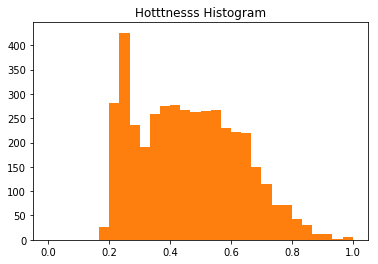

In [42]:
hotCounts = plt.hist(hot,'auto',(0.0001,1))
#plt.plot(edges[0:-1],hotCounts)
plt.title("Hotttnesss Histogram")
plt.show()

Use TF-IDF for lyrics

In [74]:
list(tracks.keys())[0]

'TRAAAAV128F421A322'

In [72]:
model = gensim.models.TfidfModel(tracks.values())

In [76]:
tfidf = dict()
for track_id in tracks:
    tfidf[track_id] = model[tracks[track_id]]

In [80]:
for v in list(tfidf.values())[0]:
    print(words[v[0]], v[1])

i 0.0497405600644
the 0.0247467522791
you 0.0188693840216
to 0.0150215902378
and 0.0400639608982
a 0.0206914586765
me 0.0120640658942
it 0.012342985432
my 0.0160129990336
is 0.023255679851
of 0.0410769035195
your 0.0191510676028
that 0.0160711267695
are 0.0405468071023
we 0.0535264473592
am 0.0463196485049
will 0.0426575935355
for 0.0788666414513
be 0.0216053007991
have 0.0445706246475
so 0.0218187737609
this 0.0267466988417
like 0.0585093565718
de 0.0604141224455
up 0.0314922548262
was 0.0724659302454
if 0.034975427221
got 0.0378319802762
would 0.0403301031668
been 0.04771966324
these 0.127934959469
seem 0.0680819428329
someon 0.0760834545799
understand 0.0784219285356
pass 0.0804978570235
river 0.1033867098
met 0.0973824758252
piec 0.100882738654
damn 0.0966802753213
worth 0.105028977751
flesh 0.111165330339
grace 0.112091149168
poor 0.224971947251
somehow 0.11170952054
ignor 0.114004787256
passion 0.118559754262
tide 0.126222159825
season 0.124390515578
seed 0.123670766961
resist 0.

In [81]:
with open("tfidfModel.pickle", 'wb') as f:
    pickle.dump(model, f)
with open("tfidfVectors.pickle", 'wb') as f:
    pickle.dump(tfidf, f)